In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import matplotlib.ticker as ticker
from IPython.display import display_html
from itertools import chain,cycle

# 1. Изучение общей информации.

In [9]:
try:
    data = pd.read_csv('datasets/games.csv', sep=',')
except FileNotFoundError: 
    data = pd.read_csv('/datasets/games.csv', sep=',')

In [10]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [12]:
data.User_Score.replace({'tbd' : np.nan}, inplace=True)

In [13]:
pd.DataFrame(round(data.isna().mean()*100, 5)).style.background_gradient('coolwarm')

,0
Name,0.011970
Platform,0.000000
Year_of_Release,1.609330
Genre,0.011970
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.319170
User_Score,54.591680


# 2. Предобработка данных.

In [14]:
data.columns = data.columns.str.lower()

### 2.1 Заполнение пропусков в данных.
* Заполняем пропуски в столбцах, где их немного. 
* В столбцах "critic_score", "user_score", "rating" пропусков > 40% и любой способ их заполнения может привести к искажению результатов исследования. В дальнейшем попробуем изучить срез данных, в котором эти данные заполнены.

In [15]:
data.name.fillna('unknown', inplace=True)
data = data[data.year_of_release.notnull()]
data.genre.fillna(data.genre.mode(), inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [43]:
# Код ревьюера

data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
total_sales           0
dtype: int64

In [44]:
# Код ревьюера

data['genre'] = data['genre'].fillna(data['genre'].mode().squeeze())

In [45]:
# Код ревьюера

data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
total_sales           0
dtype: int64

In [17]:
# Код ревьюера

demo = pd.DataFrame({'col_1' : [None, None, 3, 4]})
s_1 = pd.Series([2,2,3,3]).mode()

demo['col_1'].fillna(s_1)

0    2.0
1    3.0
2    3.0
3    4.0
Name: col_1, dtype: float64

### 2.2 Преобразуем типы данных по столбцам.
* Год релиза в string, т.к. год является целым числом (можно было бы и в строку, но с числом работать удобнее).
* Оценку пользователя в float, предварительно обработав значения "tbd" как пропуск. (tbd - "будет заполнено", но на данный момент этой информации нет).
* Отнормируем значения оценок критиков и пользователей (приведем к общей 10 бальной шкале).
* Количество продаж по регионам оставим в млн. штук, так удобнее с ними работать.

In [18]:
data = data.astype({
                    'year_of_release' : 'int64', 
                    'user_score' : 'float64',
                   })

data.critic_score = data.critic_score/10

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [20]:
data['total_sales'] = data.eu_sales + data.na_sales + data.jp_sales + data.other_sales

# 3. Исследовательский анализ данных.

### 3.1 Проанализируем общие показатели количества релизов и оценок по годам.

In [21]:
sales_years_pivot = pd.pivot_table(data = data, index = 'year_of_release', values='name', aggfunc='count')

[Text(0, 0.5, 'Количество релизов'),
 Text(0.5, 0, 'Годы'),
 Text(0.5, 1.0, 'Количество игровых релизов по годам')]

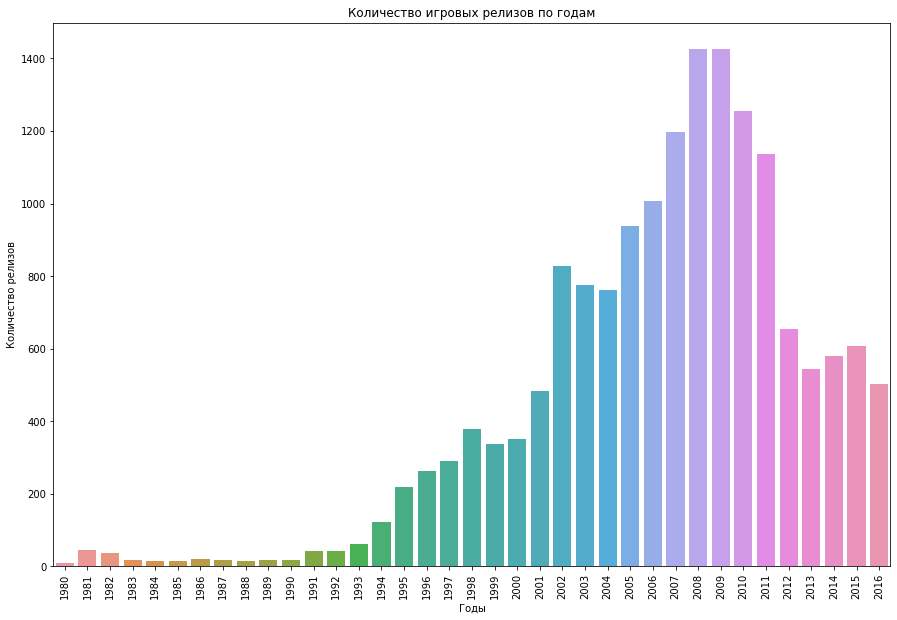

In [22]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.tick_params(axis='x', rotation=90)

sns.barplot(x = sales_years_pivot.index,y = sales_years_pivot.name, ax=ax).set(
    ylabel='Количество релизов', 
    xlabel='Годы',
    title='Количество игровых релизов по годам'
)

In [23]:
score_pivot = pd.pivot_table(data = data, index = 'year_of_release', 
                                  values=['critic_score', 'user_score', 'rating'], 
                                  aggfunc='count')
score_pivot['games'] = sales_years_pivot.name

In [24]:
for col in score_pivot.columns:
    score_pivot.rename(columns={col : 'numbers_of_'+ col}, inplace=True)

<AxesSubplot:title={'center':'Количества релизов и количества оценок по годам'}, xlabel='year_of_release', ylabel='Количество'>

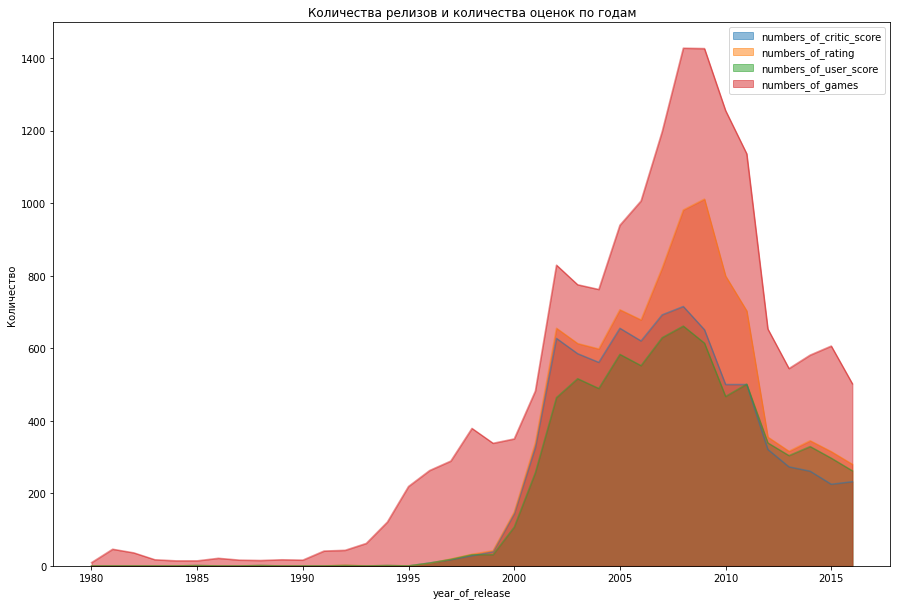

In [25]:
fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Количества релизов и количества оценок по годам')
ax1.set_xlabel('Годы')
ax1.set_ylabel('Количество')
score_pivot.plot(ax = ax1, kind='area', stacked=False)

* период с 1980 по 1997 можем не учитывать, количество выходивших игр, а также оценок слишком мало, чтобы оказать заметное влияние на результат исследования. Также данные за этот период не являются актуальными.

### 3.2 Проанализируем продажи игр самых популярных платформ.

In [27]:
platform_sales = data.groupby('platform')[['total_sales']] \
    .sum().sort_values('total_sales', ascending=False)

<AxesSubplot:title={'center':'Распределение продаж главных платформ по годам'}, xlabel='year_of_release', ylabel='platform'>

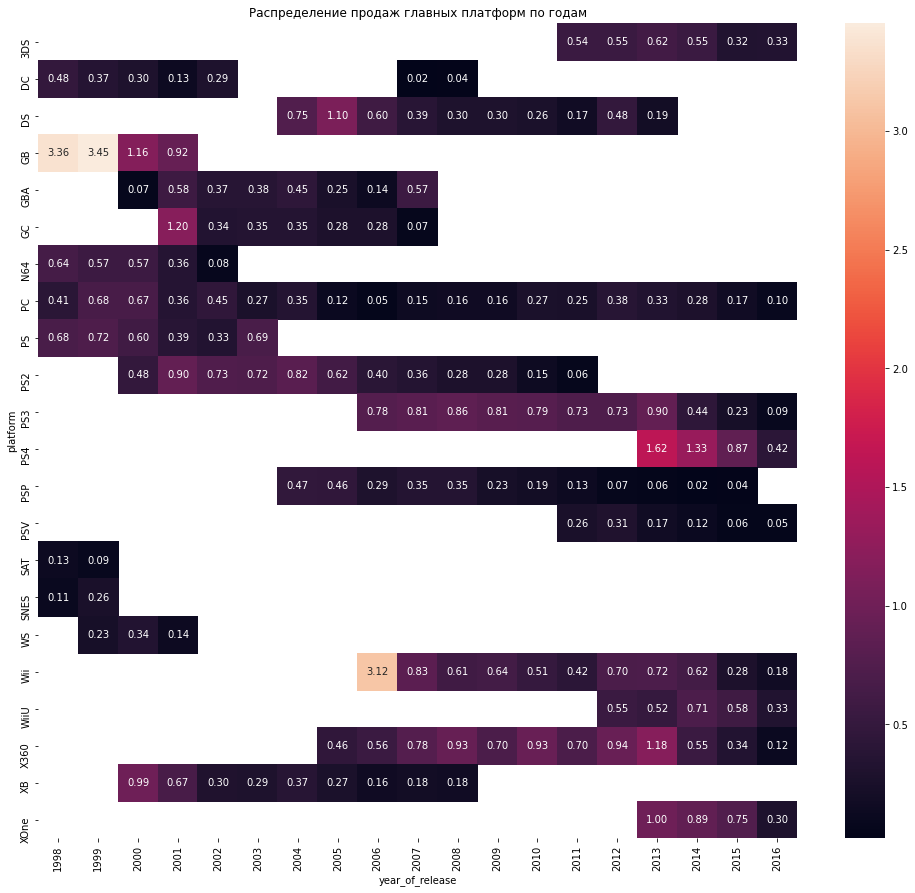

In [28]:
fig2, ax2 = plt.subplots(figsize=(17, 15))
ax2.tick_params(axis='x', rotation=90)
ax2.set_title('Распределение продаж главных платформ по годам')
sns.heatmap(data.query('year_of_release >1997').pivot_table(
                        index='platform', 
                        columns='year_of_release', 
                        values ='total_sales'), annot=True, fmt = '.2f', ax=ax2)

In [29]:
(data.year_of_release.nunique()-data.pivot_table(
    index='year_of_release', 
    columns='platform', 
    values ='total_sales').isnull().sum()).mean()

7.67741935483871

* Средний уровень "жизни" платформы около 7 лет

In [30]:
platform_sales.style.bar()

,total_sales
platform,
PS2,1233.560000
X360,961.240000
PS3,931.340000
Wii,891.180000
DS,802.780000
PS,727.580000
PS4,314.140000
GBA,312.880000
PSP,289.530000


* Видно,что первые 6 платформ сильно оторвались по продажам от остальных

* Сужаем актуальный период с (1998-2016) до (2013-2016) т.к. с 2013 года представлены почти все популярные платформы (видно из тепловой карты).
* После пика в 2013 году продажи игр на основных платформах падают (даже с учетом неполных данных за 2016 год).
* Можно предположить, что потенциально прибыльные платформы это PS4, XONE, 3DS. PS4, XONE относительно "свежие" (срок их жизни почти в 2 раза меньше среднего). Падение продаж 3DS не такое значительное, как у остальных платформ.

In [31]:
data_research = data.query('year_of_release >= 2013')

In [32]:
data_research.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           1256 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


In [33]:
platform_sales = data_research.groupby('platform')[['total_sales']] \
.sum().sort_values('total_sales', ascending=False)

In [34]:
platform_sales.style.bar()

,total_sales
platform,
PS4,314.140000
PS3,181.430000
XOne,159.320000
3DS,143.250000
X360,136.800000
WiiU,64.630000
PC,39.430000
PSV,32.990000
Wii,13.660000


<AxesSubplot:xlabel='total_sales', ylabel='platform'>

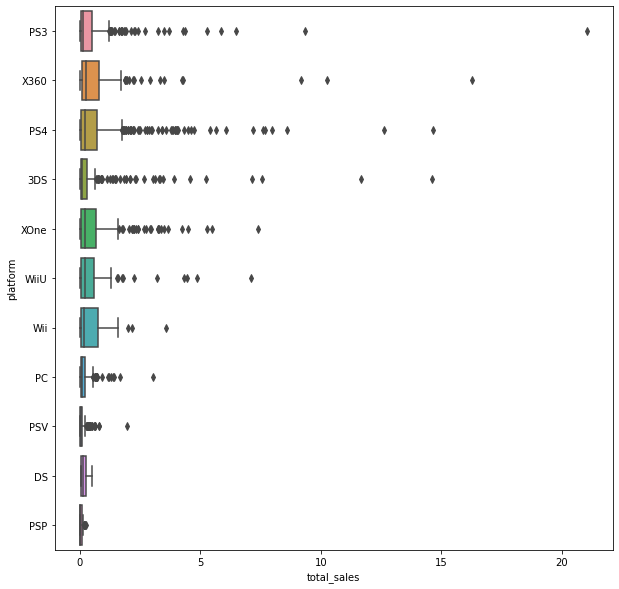

In [35]:
fig5, ax5 = plt.subplots(figsize=(10, 10))
sns.boxplot(x='total_sales', y='platform', data=data_research, orient='h')

* выбросы на этом графике - наиболее успешные игры (скорее всего эксклюзивы для этих платформ)
* больше всего успешных игр на платформах от Sony (PS3, PS4).

<AxesSubplot:xlabel='total_sales', ylabel='platform'>

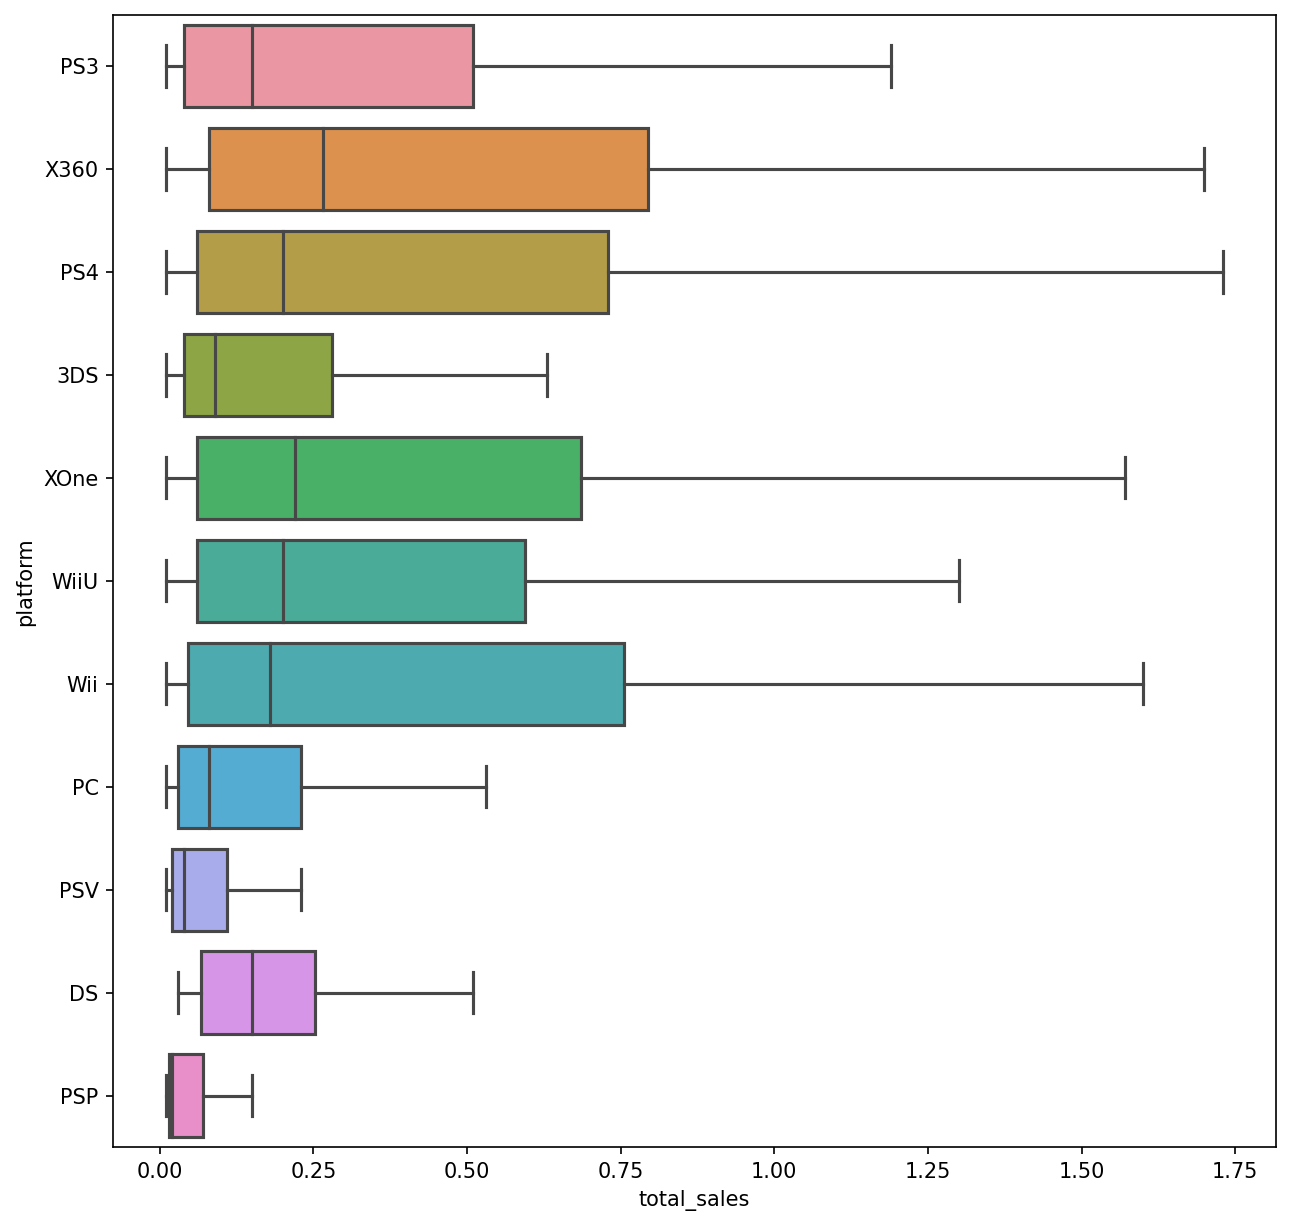

In [47]:
# Код ревьюера

fig5, ax5 = plt.subplots(figsize=(10, 10), dpi=150)
sns.boxplot(x='total_sales', y='platform', data=data_research, orient='h', showfliers=False)

### 3.3 Зависимость оценок и продаж.

In [36]:
data_x360 = data_research.query('platform == "X360"').query('total_sales <10')
data_ps4= data_research.query('platform == "PS4"').query('total_sales <10')

Коэффициент корреляции Пирсона: 0.478
Коэффициент корреляции Пирсона: -0.028


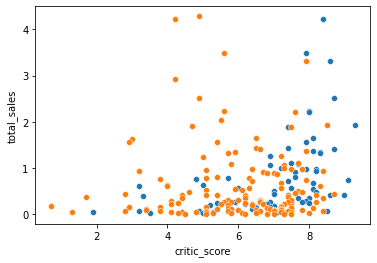

In [37]:
sns.scatterplot(data=data_x360, y='total_sales', x='critic_score')
sns.scatterplot(data=data_x360, y='total_sales', x='user_score')
print (f'Коэффициент корреляции Пирсона: {round(data_x360.total_sales.corr(data_x360.critic_score),3)}')
print (f'Коэффициент корреляции Пирсона: {round(data_x360.total_sales.corr(data_x360.user_score),3)}')

Коэффициент корреляции Пирсона: 0.245
Коэффициент корреляции Пирсона: 0.088


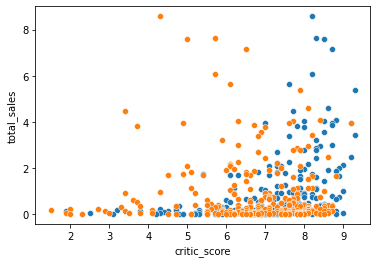

In [38]:
sns.scatterplot(data=data_ps4, y='total_sales', x='critic_score')
sns.scatterplot(data=data_ps4, y='total_sales', x='user_score')
print (f'Коэффициент корреляции Пирсона: {round(data.total_sales.corr(data.critic_score), 3)}')
print (f'Коэффициент корреляции Пирсона: {round(data.total_sales.corr(data.user_score), 3)}')

* Оценки критиков имеют бОльший вес, чем оценки пользователей как для  Х360, так и для PS4.
* Для Х360 оценки критиков влияют сильнее, чем для PS4.
* Оценки пользователей практически не влияют на продажи, в случае с X360 зафиксирована даже небольшая отрицательная корреляция.

In [48]:
# Код ревьюера

data_research.groupby('platform')[['user_score','critic_score']].corrwith(data_research['total_sales']).round(2)

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,user_score,critic_score
platform,,
3DS,0.24,0.36
DS,NaN,NaN
PC,-0.09,0.20
PS3,0.00,0.33
PS4,-0.03,0.41
PSP,-1.00,NaN
PSV,0.00,0.25
Wii,0.68,NaN
WiiU,0.42,0.38



### 3.3 Зависимость жанра и продаж.


In [39]:
data_research.pivot_table(index='genre', values ='total_sales') \
.sort_values(by='total_sales', ascending=False).style.bar()

,total_sales
genre,
Shooter,1.245882
Sports,0.703972
Platform,0.576081
Role-Playing,0.499623
Racing,0.469294
Fighting,0.441375
Action,0.420196
Misc,0.405290
Simulation,0.350968


* Самые прибыльные жанр - шутер.
* Хуже всего продаются адвенчуры (приключенческие игры).

# 4. Составляем портрет пользователя разных регионов.

In [56]:
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
#         Код ревьюера
#         html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+=df.render().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

### 4.1 Влияние платформы на продажи по регионам.

In [57]:
na_platform = data_research.groupby('platform')[['na_sales']].agg(sum)/ data_research.na_sales.sum()
na_platform = na_platform.sort_values(by='na_sales', ascending=False)[:5].style.bar()

eu_platform = data_research.groupby('platform')[['eu_sales']].agg(sum)/ data_research.eu_sales.sum()
eu_platform = eu_platform.sort_values(by='eu_sales', ascending=False)[:5].style.bar()

jp_platform = data_research.groupby('platform')[['jp_sales']].agg(sum)/ data_research.na_sales.sum()
jp_platform = jp_platform.sort_values(by='jp_sales', ascending=False)[:5].style.bar()

display_side_by_side(na_platform,eu_platform,jp_platform)

,na_sales
platform,
PS4,0.248429
XOne,0.212744
X360,0.186562
PS3,0.145073
3DS,0.087272
,eu_sales
platform,
PS4,0.359712
PS3,0.172883


* В Северной Америке распределение долей продаж более плавное, чем в стальных, нет доминирующей платфоррмы.
* В Европе c существенным отрывом лидирует PS4 (в сумме с PS3 платформы от Sony, доминирую на этом рынке)
* В Японии c существенным отрывом лидирует платформа 3DS от японской же компании Nintendo.

### 4.2 Влияние жанра на продажи по регионам.

In [51]:
na_genre = data_research.groupby('genre')[['na_sales']].agg(sum)/ data_research.na_sales.sum()
na_genre = na_genre.sort_values(by='na_sales', ascending=False)[:5].style.bar()

eu_genre = data_research.groupby('genre')[['eu_sales']].agg(sum)/ data_research.eu_sales.sum()
eu_genre = eu_genre.sort_values(by='eu_sales', ascending=False)[:5].style.bar()

jp_genre = data_research.groupby('genre')[['jp_sales']].agg(sum)/ data_research.na_sales.sum()
jp_genre = jp_genre.sort_values(by='jp_sales', ascending=False)[:5].style.bar()


display_side_by_side(na_genre,eu_genre,jp_genre)

,na_sales
genre,
Action,0.287976
Shooter,0.250714
Sports,0.149117
Role-Playing,0.106006
Misc,0.062804
,eu_sales
genre,
Action,0.301175
Shooter,0.224001


* в Северной Америке и Европе топ 5 платформ схожи.
* в Северной Америке и Европе популярены шутеры, в Японии - компьютерные(видимо) ролевые игры.

### 4.3 Влияние рейтига на продажи по регионам.

In [52]:
data_research.rating.fillna('unknown', inplace=True)

rating_sales = data_research.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].agg(sum)

rating_sales.na_sales = rating_sales.na_sales / data_research.na_sales.sum()
rating_sales.eu_sales = rating_sales.eu_sales / data_research.eu_sales.sum()
rating_sales.jp_sales = rating_sales.jp_sales / data_research.jp_sales.sum()

rating_sales 

/opt/conda/lib/python3.9/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,na_sales,eu_sales,jp_sales
rating,,,
E,0.180599,0.212528,0.107544
E10+,0.123918,0.108839,0.041838
M,0.377442,0.370497,0.100227
T,0.113751,0.106953,0.146257
unknown,0.204291,0.201183,0.604134


<AxesSubplot:xlabel='rating', ylabel='jp_sales'>

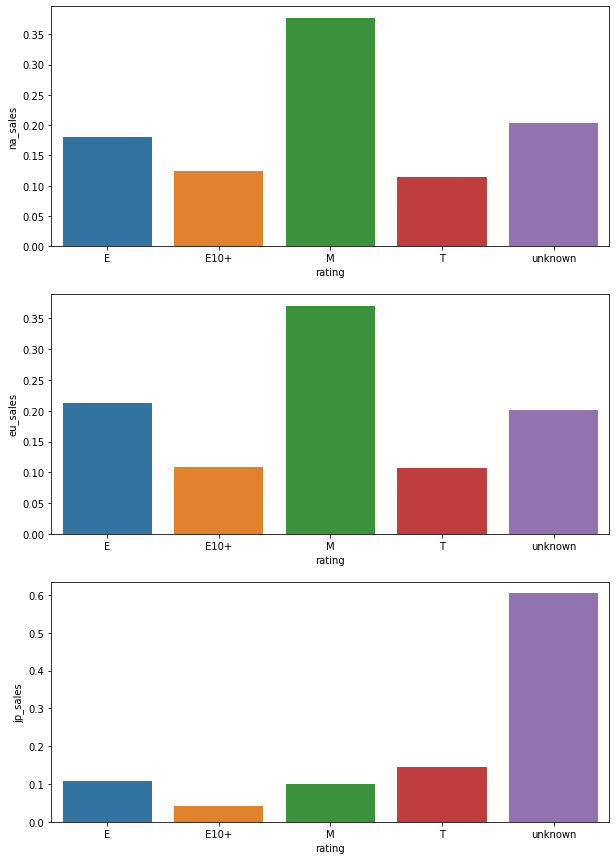

In [53]:
fig8, ax8 = plt.subplots(3, 1, figsize=(10, 15))
sns.barplot(data=rating_sales, x=rating_sales.index, y='na_sales', ax=ax8[0])
sns.barplot(data=rating_sales, x=rating_sales.index, y='eu_sales', ax=ax8[1])
sns.barplot(data=rating_sales, x=rating_sales.index, y='jp_sales', ax=ax8[2])


* В Европе и Северной америке очень похожие распределения продаж по рейтингам. Игры с рейтингом "М" лучше продаются в этих регионах. 
* В Японии суммарные продажи игр с неизвестным рейтингом (или без него) слишком велико, чтобы сделать выводы о влиянии рейтинга на продажи.

# 5. Проверки гипотез.

### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

<p>
<font size="4">
H<sub>0</sub> - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
<font>
</p>
    
<p>
<font size="4">
H<sub>1</sub> - Средние пользовательские рейтинги платформ Xbox One и PC отличаются.
<font>
</p>
    

In [58]:
user_score_xone = data_research.query('platform =="XOne"').dropna().user_score
user_score_pc = data_research.query('platform =="PC"').dropna().user_score

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<bound method Figure.show of <Figure size 1080x720 with 4 Axes>>

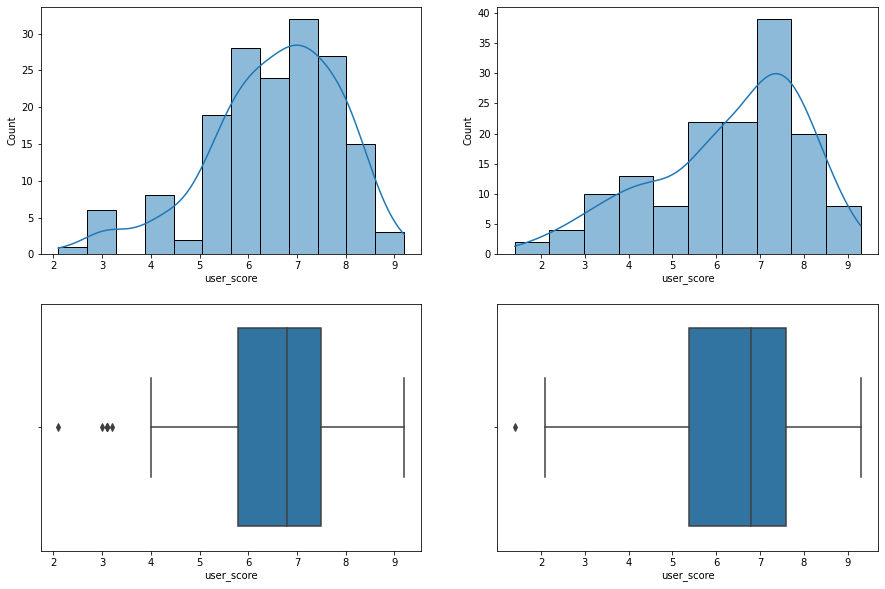

In [59]:
fig7, ax7 = plt.subplots(2,2, figsize=(15, 10))
sns.histplot(user_score_xone, kde=True, ax = ax7[0][0])
sns.histplot(user_score_pc, kde=True, ax = ax7[0][1])
sns.boxplot(user_score_xone, ax = ax7[1][0])
sns.boxplot(user_score_pc, ax = ax7[1][1])
fig7.show

In [60]:
alpha = 0.05 
results = st.ttest_ind(
    user_score_xone,
    user_score_pc
)
if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


* средние равны.

### 5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<p>
<font size="4">
H<sub>0</sub> - Средние пользовательские рейтинги жанров Action и Sports одинаковы.
<font>
</p>
    
<p>
<font size="4">
H<sub>1</sub> - Средние пользовательские рейтинги жанров Action и Sports различаются.
<font>
</p>


In [61]:
user_score_action = data_research.query('genre =="Action"').dropna().user_score
user_score_sports = data_research.query('genre =="Sports"').dropna().user_score

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<bound method Figure.show of <Figure size 1080x720 with 4 Axes>>

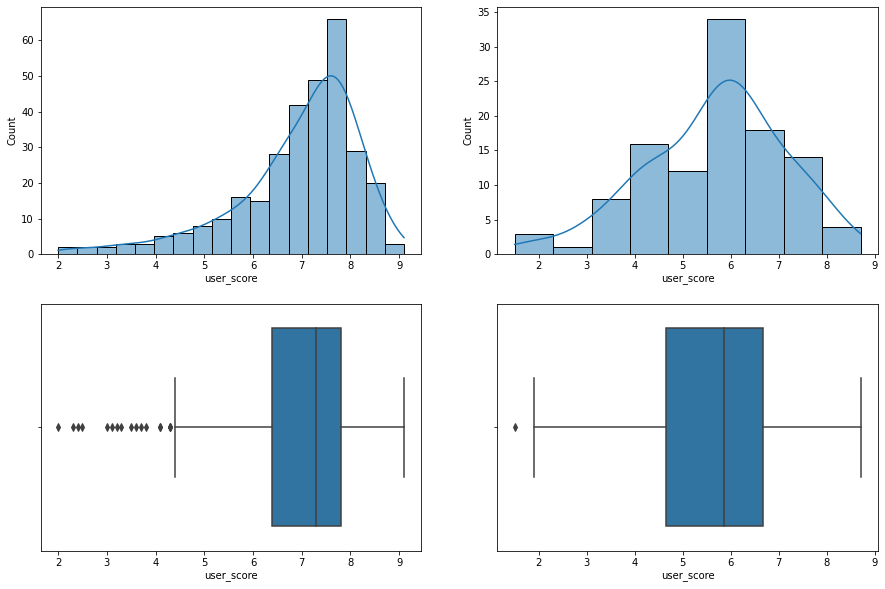

In [62]:
fig7, ax7 = plt.subplots(2,2, figsize=(15, 10))
sns.histplot(user_score_action, kde=True, ax = ax7[0][0])
sns.histplot(user_score_sports, kde=True, ax = ax7[0][1])
sns.boxplot(user_score_action, ax = ax7[1][0])
sns.boxplot(user_score_sports, ax = ax7[1][1])
fig7.show

In [63]:
alpha = 0.05 
results = st.ttest_ind(
    user_score_action,
    user_score_sports
)
if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


* средние не равны.

In [66]:
# Код ревьюера

'{:.0%}'.format(user_score_action.mean() / user_score_sports.mean() - 1)

'22%'

# 6. Выводы.

1. Мало данных об оценках, особенно за период с 1980 по 1997. Связано с недостаточным развитием интернета и игровой прессы в этот период.
2. Оценки критиков влияют на продажи сильнее оценок пользователей.
3. Общие показатели продаж (распределение по платформам и рейтингу) в Японии, не сильно, но отличается от Европы и Америки. Скорее всего это связано с культурным аспектом.